# Sprint 1

# Data Cleaning and merging

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the datasets
players = pd.read_excel('players.xlsx')
appearances = pd.read_excel('appearances.xlsx')
game_events = pd.read_excel('game_events.xlsx')
game_lineups = pd.read_excel('game_lineups.xlsx')
games = pd.read_excel('games.xlsx')

In [100]:
test_data = pd.read_excel('test data.xlsx')
test_data

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [105]:
players.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

In [106]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [107]:
game_events.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [108]:
game_lineups.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [8]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [9]:
players

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [109]:
players.dtypes

player_id                               int64
name                                   object
last_season                             int64
current_club_id                         int64
player_code                            object
country_of_birth                       object
date_of_birth                  datetime64[ns]
sub_position                           object
position                               object
foot                                   object
height_in_cm                          float64
market_value_in_eur                   float64
highest_market_value_in_eur           float64
contract_expiration_date       datetime64[ns]
agent_name                             object
dtype: object

In [3]:
players.isnull().sum()

player_id                       0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                           11
height_in_cm                    3
market_value_in_eur            38
highest_market_value_in_eur     4
contract_expiration_date       46
agent_name                     45
dtype: int64

In [4]:
players['foot'].fillna(players['foot'].mode()[0], inplace=True)
players['height_in_cm'].fillna(players['height_in_cm'].median(), inplace=True)
players['market_value_in_eur'].fillna(players['market_value_in_eur'].median(), inplace=True)
players['highest_market_value_in_eur'].fillna(players['highest_market_value_in_eur'].median(), inplace=True)
players['contract_expiration_date'].fillna('2025-01-01', inplace=True)

In [5]:
players.isnull().sum()

player_id                       0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                            0
height_in_cm                    0
market_value_in_eur             0
highest_market_value_in_eur     0
contract_expiration_date        0
agent_name                     45
dtype: int64

In [6]:
players.dtypes

player_id                               int64
name                                   object
last_season                             int64
current_club_id                         int64
player_code                            object
country_of_birth                       object
date_of_birth                  datetime64[ns]
sub_position                           object
position                               object
foot                                   object
height_in_cm                          float64
market_value_in_eur                   float64
highest_market_value_in_eur           float64
contract_expiration_date       datetime64[ns]
agent_name                             object
dtype: object

In [7]:
# Save the cleaned data
players.to_csv('players_cleaned.csv', index = False)

In [9]:
# Save the cleaned data
players.to_excel('players_cleaned.xlsx', index = False)

In [8]:
appearances 

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [9]:
appearances.dtypes

appearance_id             object
game_id                    int64
player_id                  int64
date              datetime64[ns]
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [10]:
appearances.isnull().sum()

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [11]:
appearances['minutes_played'].unique()

array([ 90,  74,   3,  21,  73,  43,  56,  19,  78,  28,   9,  45,  85,
        66,  24,  84,  20,  18,  62, 120,  71,   1,  31,  81,  68,  60,
        70,  52,   6,  12,  76,  82,   2,  88,  69,  67,  65,  10,  17,
        11,  63,  15,  36,  72,  77,   8,  32,  87,  29,  79,  39,  83,
        37,  58,  80,  38,  59,  64,  54,   5,  47,  75,  22,  51,  27,
        13,  26,  14,  30,  16,  35,  33,  23,  86,  89,  57,  61,  25,
         7,  34,   4,  49,  55,  40, 101,  46,  42,  48,  53,  50],
      dtype=int64)

In [12]:
# Save the cleaned data
appearances.to_csv('appearances_cleaned.csv', index = False)

In [13]:
# Save the cleaned data
appearances.to_excel('appearances_cleaned.xlsx', index = False)

In [14]:
game_events

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [15]:
game_events.dtypes

game_event_id               object
date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

In [16]:
game_events.isnull().sum()

game_event_id          0
date                   0
game_id                0
minute                 0
type                   0
player_id              0
description          933
player_in_id         694
player_assist_id    1709
dtype: int64

In [17]:
game_events['description'] = game_events['description'].fillna('No description')

In [18]:
game_events = game_events.drop(columns=['player_in_id','player_assist_id'])

In [19]:
game_events.isnull().sum()

game_event_id    0
date             0
game_id          0
minute           0
type             0
player_id        0
description      0
dtype: int64

In [20]:
game_events.dtypes

game_event_id            object
date             datetime64[ns]
game_id                   int64
minute                    int64
type                     object
player_id                 int64
description              object
dtype: object

In [21]:
game_events['minute'].unique()

array([ 62,  54,  79,  72,  63,  90,  65,  86,  56,  32,  33,  36,  48,
        68,  45,  12,  52,  11,  71,  82,  60,  73,  38,  75,  78,  85,
        25,  24,  74,  66,   6,  84,  27,  20,  81,  35,  44,  28,  37,
        67,  46,  50,  69,   9,  80,  53,  88,  77,  39,  57,  58,  55,
        42,  29,  70,  59,  83,  87,  41,  76,  43,  51,  16,  13,  40,
        64,   2,  34,   4,  22,  89,  14,  23,  49,  21,  31,  17,  61,
        10,   5,  91, 105,  18,   1,  30,  26,   7,  19,  -1,   8, 108,
       101,  47,  97,  15,   3,  98, 106, 102, 110, 103, 100], dtype=int64)

In [22]:
# Save the cleaned data
game_events.to_excel('game_events_cleaned.xlsx', index = False)

In [23]:
# Save the cleaned data
game_events.to_csv('game_events_cleaned.csv', index = False)

In [24]:
game_lineups

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [25]:
game_lineups.dtypes

game_lineups_id    object
game_id             int64
type               object
number              int64
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [26]:
game_lineups.isnull().sum()

game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

In [27]:
# Save the cleaned data
game_lineups.to_csv('game_lineups_cleaned.csv', index = False)

In [28]:
# Save the cleaned data
game_lineups.to_excel('game_lineups_cleaned.xlsx', index = False)

In [29]:
games

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [30]:
games.dtypes

game_id                            int64
competition_id                    object
season                             int64
round                             object
date                      datetime64[ns]
home_club_goals                    int64
away_club_goals                    int64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
home_club_formation              float64
away_club_formation              float64
home_club_name                    object
away_club_name                    object
aggregate                         object
competition_type                  object
dtype: object

In [31]:
games.isnull().sum()

game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee                      2
home_club_formation       3268
away_club_formation       3268
home_club_name             110
away_club_name              63
aggregate                    0
competition_type             0
dtype: int64

In [32]:
games = games.drop(columns=['home_club_formation','away_club_formation'])

In [33]:
games['home_club_position'].fillna(games['home_club_position'].median(), inplace=True)
games['away_club_position'].fillna(games['away_club_position'].median(), inplace=True)

games['home_club_manager_name'].fillna(games['home_club_manager_name'].mode()[0], inplace=True)
games['away_club_manager_name'].fillna(games['away_club_manager_name'].mode()[0], inplace=True)

games['home_club_name'].fillna(games['home_club_name'].mode()[0], inplace=True)
games['away_club_name'].fillna(games['away_club_name'].mode()[0], inplace=True)

games['attendance'].fillna(games['attendance'].median(), inplace=True)

games['referee'].fillna('Unknown', inplace=True)


In [34]:
games.isnull().sum()

game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_goals           0
away_club_goals           0
home_club_position        0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
attendance                0
referee                   0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
dtype: int64

In [35]:
games.dtypes

game_id                            int64
competition_id                    object
season                             int64
round                             object
date                      datetime64[ns]
home_club_goals                    int64
away_club_goals                    int64
home_club_position               float64
away_club_position               float64
home_club_manager_name            object
away_club_manager_name            object
stadium                           object
attendance                       float64
referee                           object
home_club_name                    object
away_club_name                    object
aggregate                         object
competition_type                  object
dtype: object

In [36]:
print(games.columns)

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')


In [37]:
# Save the cleaned data
games.to_csv('games_cleaned.csv', index = False)

In [38]:
# Save the cleaned data
games.to_excel('games_cleaned.xlsx', index = False)

In [39]:
players.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

In [40]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [41]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [42]:
game_lineups.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [43]:
game_events.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description'],
      dtype='object')

players table have 152 rows and player_id is the primary key

appearances table have 3568 rows and appearance_id is the primary key

game_events table have 1849 rows and game_event_id is the primary key

game_lineups table have 219 rows and game_lineups_id is the primary key

games table have 3268 rows and game_id is the primary key

## Table Mearging 

In [61]:
# mearging the table
merged_data = pd.merge(appearances, players, on='player_id', how='left')
merged_data = pd.merge(merged_data, games, on='game_id', how='left')
merged_data = pd.merge(merged_data, game_events, on=['game_id','player_id'], how='left')
merged_data = pd.merge(merged_data, game_lineups, on=['game_id','player_id'], how='left')

In [62]:
merged_data

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,date,minute,type_x,description,game_lineups_id,type_y,number,player_name_y,team_captain,position_y
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,2012-07-14,50.0,Goals,", Long distance kick, 1. Goal of the Season As...",NaN,NaN,NaN,NaN,NaN,NaN
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,2012-07-19,74.0,Substitutions,", Not reported",NaN,NaN,NaN,NaN,NaN,NaN
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,2020-09-26,77.0,Substitutions,No description,NaN,NaN,NaN,NaN,NaN,NaN
3718,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,...,2020-09-26,84.0,Substitutions,No description,NaN,NaN,NaN,NaN,NaN,NaN
3719,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
merged_data.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_x', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'competition_id_y', 'season', 'round', 'date_y', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date', 'minute',
       'type_x', 'description', 'game_lineups_id', 'type_y', 'number',
       'player_name_y', 'team_captain', 'position_y'],
      dtype='object')

In [64]:
merged_data.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
name                              0
last_season                       0
current_club_id                   0
player_code                       0
country_of_birth                  0
date_of_birth                     0
sub_position                      0
position_x                        0
foot                              0
height_in_cm                      0
market_value_in_eur               0
highest_market_value_in_eur       0
contract_expiration_date          0
agent_name                     1081
competition_id_y                  0
season                            0
round                       

In [65]:
merged_data = merged_data.drop(columns = ['type_x','game_lineups_id','type_y','number','player_name_y','team_captain','position_y','date','competition_id_y', 'player_name_x'])

In [66]:
merged_data['minute'].fillna(merged_data['minute'].mean(), inplace=True)
merged_data['agent_name'].fillna('Unknown', inplace=True)


In [67]:
merged_data.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
name                              0
last_season                       0
current_club_id                   0
player_code                       0
country_of_birth                  0
date_of_birth                     0
sub_position                      0
position_x                        0
foot                              0
height_in_cm                      0
market_value_in_eur               0
highest_market_value_in_eur       0
contract_expiration_date          0
agent_name                        0
season                            0
round                             0
date_y                            0
home_club_goals             

In [70]:
numerical_columns = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 
                     'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 
                     'home_club_position', 'away_club_position', 'attendance', 'minute',
                     'last_season', 'season','home_club_goals', 'away_club_goals'
                    ]
for col in numerical_columns:
    q1 = merged_data[col].quantile(0.25)
    q3 = merged_data[col].quantile(0.75)
    iqr = q3-q1
    lf = q1-1.5*iqr
    uf = q3+1.5*iqr
    outlier = (merged_data[col] < lf) | (merged_data[col] > uf)
    
    
    # apply capping
    merged_data[col] = merged_data[col].clip(lower=lf, upper=uf)
print(outlier.sum())

0


In [69]:
# Save the cleaned data
merged_data.to_csv('football_data_merged_cleaned2.csv', index = False)

In [61]:
# Save the cleaned data
merged_data.to_excel('football_data_merged_cleaned2.xlsx', index = False)

In [149]:
merged_data.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_x',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'season', 'round', 'date_y', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'minute', 'description'],
      dtype='object')

In [85]:
merged_data.head(10)

,appearance_id,game_id,player_id,date_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,goal_difference,game_event_id,minute,description
0,2224728_119169,2224728,119169,2012-07-13,DK1,0,0,0,0,90,...,9728.0,Michael Svendsen,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league,0,NaN,62.123886,NaN
1,2224732_161244,2224732,161244,2012-07-14,DK1,0,0,1,0,90,...,2995.0,Claus Bo Larsen,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league,5,d9f02a9d767f319e58909ba1e1de6d23,50.000000,", Long distance kick, 1. Goal of the Season As..."
2,2224729_39467,2224729,39467,2012-07-15,DK1,0,0,0,0,90,...,10806.0,Lars Christoffersen,Brondby IF,Odense Boldklub,00:01:00,domestic_league,-1,NaN,62.123886,NaN
3,2232104_119169,2232104,119169,2012-07-19,ELQ,0,0,0,0,74,...,9000.0,Boako Jovanetic,Aarhus Gymnastik Forening,Borussia Dortmund,01:02:00,international_cup,-1,2ab0ea7af8313c0da07c723728bb6a49,74.000000,", Not reported"
4,2219794_39475,2219794,39475,2012-07-22,BESC,0,0,0,0,3,...,14485.0,Laurent Colemonts,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other,1,NaN,62.123886,NaN
5,2224560_39467,2224560,39467,2012-07-22,DK1,1,0,0,0,90,...,7895.0,Claus Bo Larsen,Aalborg BK,BRA NDBYERNES,02:01:00,domestic_league,1,e7631c64f9a922d4370ba6db39ccbfac,60.000000,"1. Yellow card , Foul"
6,2224564_46472,2224564,46472,2012-07-22,DK1,0,0,0,0,21,...,7123.0,Mads-Kristoffer Kristoffersen,Odense Boldklub,Randers Fodbold Club,00:01:00,domestic_league,-1,NaN,62.123886,NaN
7,2224569_161244,2224569,161244,2012-07-22,DK1,1,0,0,1,90,...,6575.0,Michael Tykgaard,Sonderjyske Fc,Football Club Ka Benhavn,01:01:00,domestic_league,0,abe3da42c64790a4c4ae00ff82c3024f,68.000000,"1. Yellow card , Foul"
8,2224568_119169,2224568,119169,2012-07-23,DK1,0,0,0,0,73,...,7323.0,Jens Maae,Aarhus Gymnastik Forening,Esbjerg fB,00:00:00,domestic_league,0,1b4e309dd87c3a8f86e0675b9b29d36c,73.000000,", Tactical"
9,2244352_119169,2244352,119169,2012-07-26,ELQ,0,0,0,0,43,...,5000.0,Stephan Studer,Borussia Verein für Leibesübung 1900 e.V.,Aarhus Gymnastik Forening,03:01:00,international_cup,2,b8d0f42d674f31af1a4414a46ffb713f,43.000000,", Not reported"


# Sprint 3
# Performance Analysis

### Q1: What is the probability of a player scoring a goal, given that they played at least 60 minutes in a match?

* P(Goal∣Minutes Played≥60)=  P(Goal ∩ Minutes Played≥60) /P(Minutes Played≥60)

Understand how much time on the field impacts the probability of scoring goals.

In [65]:
# Filter appearances where players played at least 60 minutes
played_60_plus = appearances[appearances['minutes_played'] >=60]


# Calculate the number of games where the player played 60+ minutes and scored
goal_and_60_plus = played_60_plus[played_60_plus['goals'] > 0].shape[0]

# Calculate conditional probability: P(Goal | Minutes Played >= 60)
p_goal_given_60_plus = goal_and_60_plus / played_60_plus.shape[0]

print("Probability of scoring given 60+ minutes played is: ",p_goal_given_60_plus)


Probability of scoring given 60+ minutes played is:  0.09471281856219095


### Q2: What is the joint probability of a match having more than 2 goals and more than 30,000 spectators?

* P(Goals>2∩Attendance>30000)= Matches with Both Conditions / Total Matches

Analyze the relationship between high-scoring matches and large crowds to identify exciting games.

In [66]:
# Create a new column for total goals in the match
games['total_goals'] = games['home_club_goals'] + games['away_club_goals']

# Filter matches with more than 2 goals and more than 30,000 spectators
high_scoring_and_high_attendance = games[(games['total_goals'] > 2) & (games['attendance'] > 30000)]

# Calculate joint probability
p_high_scoring_and_high_attendance = high_scoring_and_high_attendance.shape[0] / games.shape[0]

print("Joint probability of a match with >2 goals and >30,000 attendance: ",p_high_scoring_and_high_attendance)

Joint probability of a match with >2 goals and >30,000 attendance:  0.2347001223990208


### Q3: What is the probability of a player receiving a red card, given they have already received a yellow card in the same match?

* P(Red Card∣Yellow Card)= P(Red Card∩Yellow Card) / P(Yellow Card)

Explore the risk of disciplinary escalation for players receiving yellow cards.

In [67]:
# Filter appearances with at least one yellow card
yellow_card = appearances[appearances['yellow_cards'] > 0]

# Calculate the number of matches where the player got both yellow and red cards
red_and_yellow_card  = yellow_card[yellow_card['red_cards'] >0].shape[0]

# Calculate conditional probability
p_red_given_yellow = red_and_yellow_card / yellow_card.shape[0]

print("Probability of receiving a red card given a yellow: ",p_red_given_yellow)

Probability of receiving a red card given a yellow:  0.004545454545454545


## Business Question 1:
###  What is the average attendance at games, and can we assume that the sampling distribution of the attendance mean is approximately normal?

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [69]:
# Calculate average attendance
avg_attendance = games['attendance'].mean()

In [70]:
# Sample size for CLT demonstration
sample_size = 30
samples = [games['attendance'].sample(sample_size).mean() for _ in range(1000)]

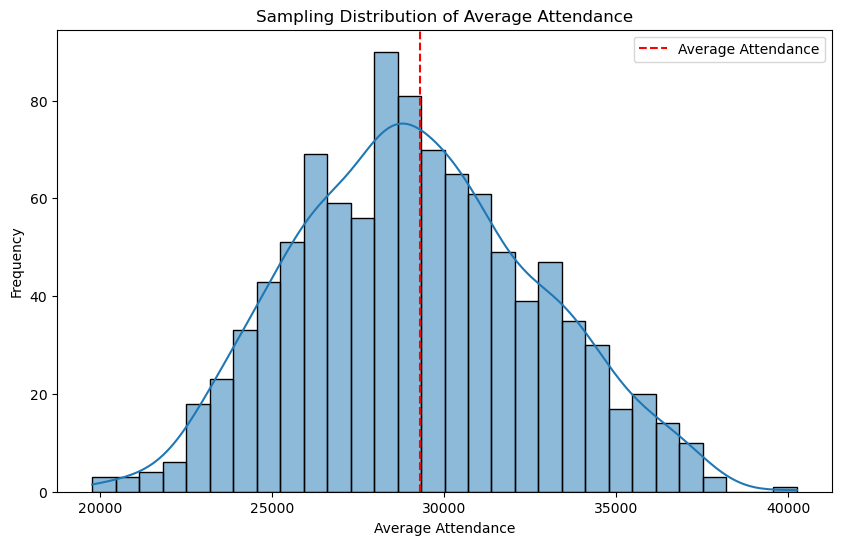

In [71]:
# Plotting the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=30, kde=True)
plt.axvline(x=avg_attendance, color='red', linestyle='--', label='Average Attendance')
plt.title('Sampling Distribution of Average Attendance')
plt.xlabel('Average Attendance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [72]:
# Check normality of samples
stat, p = stats.shapiro(samples)
print(f'Shapiro-Wilk test for sample means: Statistics={stat:.3f}, p-value={p:.3f}')

Shapiro-Wilk test for sample means: Statistics=0.994, p-value=0.001


Interpretation: 

The p-value (0.001) suggests a small deviation from perfect normality, but the distribution is still close enough to normal for practical purposes

We can reasonably assume that the mean attendance follows a normal distribution



## Business Question:
### What is the average market value of players, and how does the sample mean compare to the population mean?

In [73]:
# Calculate the population mean of market value
population_mean = players['market_value_in_eur'].mean()
print(f'Population Mean Market Value: {population_mean:.2f} EUR')

Population Mean Market Value: 3020723.68 EUR


In [74]:
# Sample size for CLT demonstration
sample_size = 30
num_samples = 1000

In [75]:
# Create samples and calculate means
sample_means = [players['market_value_in_eur'].sample(sample_size, replace=True).mean() for _ in range(num_samples)]

In [76]:
# Calculate the average of the sample means
sample_mean = np.mean(sample_means)
print(f'Sample Mean Market Value: {sample_mean:.2f} EUR')

Sample Mean Market Value: 2975829.17 EUR


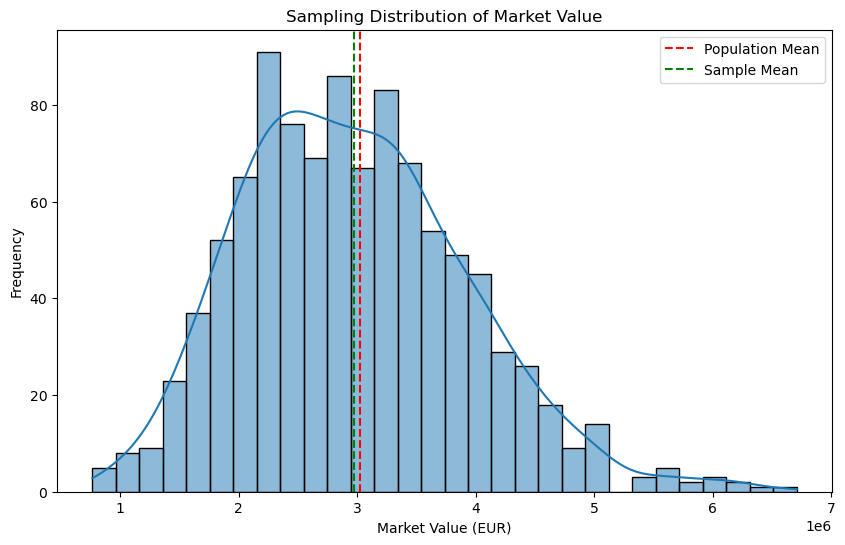

In [77]:
# Plotting the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.axvline(x=sample_mean, color='green', linestyle='--', label='Sample Mean')
plt.title('Sampling Distribution of Market Value')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [78]:
# Check normality of sample means using Shapiro-Wilk test
stat, p = stats.shapiro(sample_means)
print(f'Shapiro-Wilk test for sample means: Statistics={stat:.3f}, p-value={p:.3f}')

Shapiro-Wilk test for sample means: Statistics=0.983, p-value=0.000


#### CLT rules   
i. The sample distribution curve is tending to be a normal distribution curve irrespective of the type of population distribution when the sample size is >=30.

ii. Sample Mean apro= Population Mean

iii. The standard deviation of the sample means is the standard deviation of the population divided by the square root of the sample size(n).

#### We observed that it  follow  rules of central limit theorem

Interpretation: It follows all the rules of central limit theorem.
    The sample mean provides a good approximation of the population mean

# Sprint 4
# Performance analysis
## Business question 1
### Q1: Can we predict whether a team will win a match based on match-related factors?

Use logistic regression to classify if a home team will win based on:
* Home and away team positions
* Attendance
* Competition type (categorical feature)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
# Create target variable: 1 if home team wins, 0 otherwise
games['home_win'] = (games['home_club_goals'] > games['away_club_goals']).astype(int)

In [81]:
# Encode categorical feature 'competition_type'
label_encoder = LabelEncoder()
games['competition_type_encoded'] = label_encoder.fit_transform(games['competition_type'])

In [82]:
# Select features and target variable
X = games[['home_club_position', 'away_club_position', 'attendance', 'competition_type_encoded']]
y = games['home_win']

In [83]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [85]:
# Build and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
# Predictions and evaluation
y_pred = model.predict(X_test)

In [87]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[426  94]
 [218 243]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       520
           1       0.72      0.53      0.61       461

    accuracy                           0.68       981
   macro avg       0.69      0.67      0.67       981
weighted avg       0.69      0.68      0.67       981



In [88]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc

0.7573252127482062

<Figure size 1000x800 with 0 Axes>

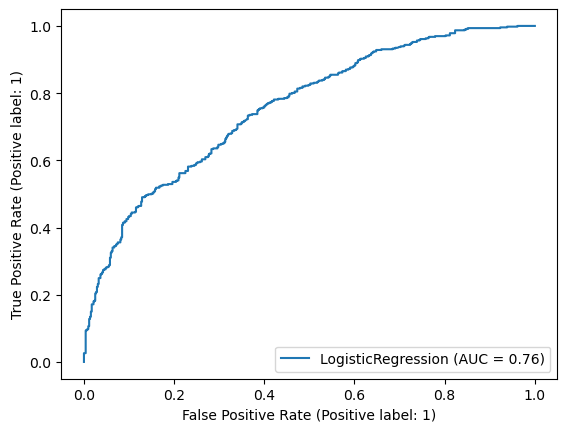

In [89]:
# ROC curve
import sklearn.metrics as mt
plt.figure(figsize = (10,8))
mt.plot_roc_curve(model, X_test, y_test)

Interpretatiion: Model Performance: The model achieves a moderate accuracy of 68%, indicating that it correctly classifies match outcomes 68% of the time.
Classification Report: Precision, recall, and F1-score for predicting a win (class 1) are lower than for a loss (class 0), which suggests the model is better at predicting when a home team will not win than when it will.
Precision for predicting a win is 0.72, while recall is 0.53, showing the model predicts wins more often than actual wins occur.
ROC-AUC Score: The ROC-AUC score of 0.757 suggests a fair ability of the model to discriminate between wins and non-wins.

## Business question 2
 ### Q2: Can we predict if a player will receive a red card based on their performance metrics?
 
Predict if a player will get a red card based on:
* Minutes played
* Goals scored
* Yellow cards received

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [80]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [81]:
# Select features and target variable
X = appearances[['minutes_played', 'goals', 'yellow_cards']]
y = appearances['red_cards']

In [82]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [84]:
# Build and train logistic regression model with class weight adjustment
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [85]:
# Predictions and evaluation
y_pred = model.predict(X_test)

In [88]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[784 285]
 [  2   0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85      1069
           1       0.00      0.00      0.00         2

    accuracy                           0.73      1071
   macro avg       0.50      0.37      0.42      1071
weighted avg       1.00      0.73      0.84      1071



In [89]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc

0.6931711880261927

<Figure size 1000x800 with 0 Axes>

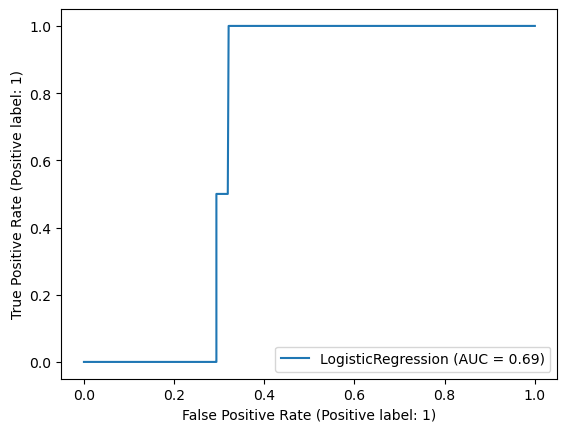

In [92]:
# ROC curve
import sklearn.metrics as mt
plt.figure(figsize = (10,8))
mt.plot_roc_curve(model, X_test, y_test)

Interpretation : Model Performance: The model has an overall accuracy of 73%, but the high accuracy primarily reflects the model’s effectiveness in identifying players who do not receive red cards.
Classification Report: The model struggles to predict red cards (class 1), achieving a recall of 0.00 for players who do receive red cards, meaning it fails to identify red card instances.
ROC-AUC Score: The ROC-AUC score of 0.693 suggests limited ability to differentiate between players who will and will not receive a red card.

# Sprint 5
# player profile and market value

## 1. Business Question for Simple Linear Regression
### Question: Can we predict a player's market value based on their goals scored in the previous season?
Objective: To establish a linear relationship between the number of goals scored and the market value of a player, allowing clubs to estimate the potential market value of players based on their performance metrics.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
# Aggregate goals per player
goals_per_player = appearances.groupby('player_id')['goals'].sum().reset_index()

In [95]:
# Merge players data with goals data
players_and_goals = pd.merge(players, goals_per_player, on='player_id')

In [96]:
# Filter necessary columns
data_simple = players_and_goals[['goals', 'market_value_in_eur']].dropna()

In [97]:
# Splitting the dataset into features and target variable
X = data_simple[['goals']]
y = data_simple['market_value_in_eur']

In [98]:
# Scale features (optional, but helps with interpretability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [100]:
# Create the linear regression model
model_simple = LinearRegression()

In [101]:
# Fit the model
model_simple.fit(X_train, y_train)

LinearRegression()

In [102]:
# Make predictions
y_pred_simple = model_simple.predict(X_test)

In [103]:
# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Mean Squared Error: {mse_simple}")
print(f"R^2 Score: {r2_simple}")


Mean Squared Error: 33017684296430.918
R^2 Score: -0.040111440628861406


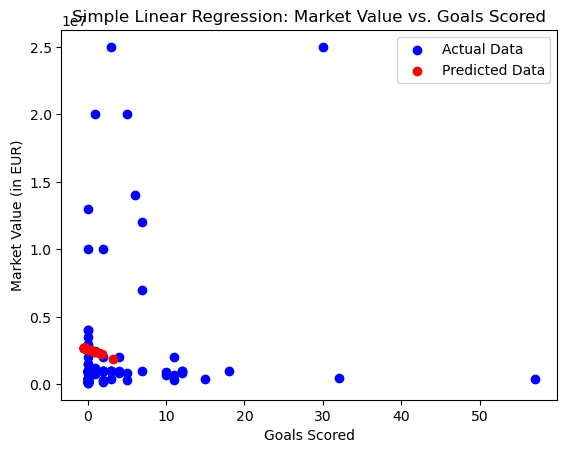

In [104]:
# Visualizing the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_simple, color='red', label='Predicted Data')
plt.xlabel('Goals Scored')
plt.ylabel('Market Value (in EUR)')
plt.title('Simple Linear Regression: Market Value vs. Goals Scored')
plt.legend()
plt.show()

Interpretation: 

## 2. Business Question for Multiple Linear Regression
### Question: How do various performance metrics (goals scored, assists, minutes played, and yellow cards) affect a player's market value?

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [106]:
# Aggregate features from appearances
appearances_agg = appearances.groupby('player_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum',
    'yellow_cards': 'sum'
}).reset_index()

In [107]:
# Merge players data with aggregated appearances data
players_appearances = pd.merge(players, appearances_agg, on='player_id')

In [108]:
# Filter necessary columns
data_multi = players_appearances[['goals', 'assists', 'minutes_played', 'yellow_cards', 'market_value_in_eur']].dropna()

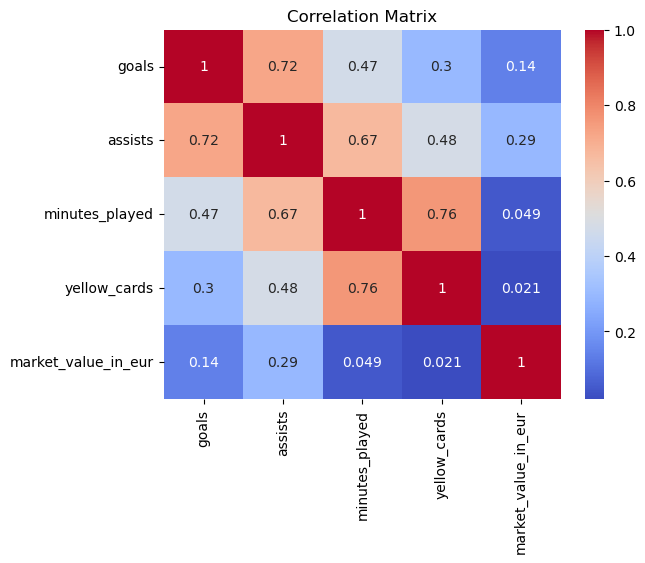

In [110]:
# Correlation Matrix
import seaborn as sns
correlation_matrix = data_multi.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [111]:
# Select features and target variable
X_multi = data_multi[['goals', 'assists', 'minutes_played', 'yellow_cards']]
y_multi = data_multi['market_value_in_eur']

In [112]:
# Checking for multicollinearity
X_multi_const = sm.add_constant(X_multi)  # Add constant for VIF calculation
vif_data = pd.DataFrame()
vif_data["features"] = ['const'] + list(X_multi.columns)  # Include 'const' for constant term
vif_data["VIF"] = [variance_inflation_factor(X_multi_const.values, i) for i in range(X_multi_const.shape[1])]

print("VIF Data:\n", vif_data)


VIF Data:
          features       VIF
0           const  1.581290
1           goals  2.110908
2         assists  2.949677
3  minutes_played  3.318119
4    yellow_cards  2.392044


In [113]:
# Scaling features
scaler = StandardScaler()
X_scaled_multi = scaler.fit_transform(X_multi)

In [114]:
# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_scaled_multi, y_multi, test_size=0.3, random_state=42)

In [115]:
# Create and fit the multiple linear regression model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [116]:
# Make predictions
y_pred_multi = model_multi.predict(X_test_multi)

In [117]:
# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Squared Error (Multiple Regression): {mse_multi}")
print(f"R^2 Score (Multiple Regression): {r2_multi}")


Mean Squared Error (Multiple Regression): 28161057795364.62
R^2 Score (Multiple Regression): 0.11288029377833975


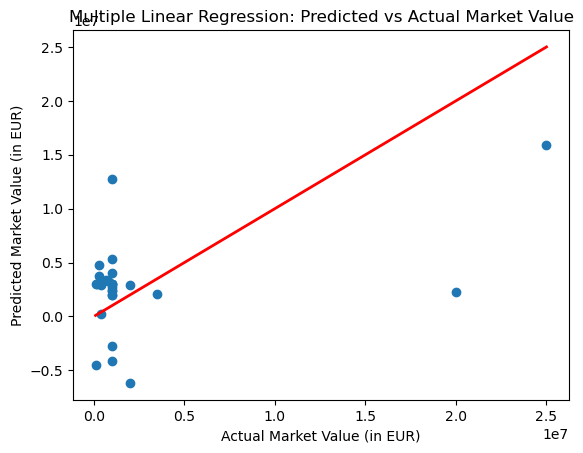

In [118]:
# Visualizing the predicted vs actual values
plt.scatter(y_test_multi, y_pred_multi)
plt.xlabel('Actual Market Value (in EUR)')
plt.ylabel('Predicted Market Value (in EUR)')
plt.title('Multiple Linear Regression: Predicted vs Actual Market Value')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='red', linewidth=2)
plt.show()

Interpretation:
The low R² score and high MSE indicate that the model may not be effective for predicting market value.

# Sprint 6

## Business Questions for Hypothesis Testing
### Is there a significant difference in average goals scored between teams that play at home and those that play away?



* Hypothesis:
        
        Null Hypothesis (H0): There is no difference in the average number of goals scored by home and away teams.
        
        Alternative Hypothesis (H1): There is a difference in the average number of goals scored by home and away teams.
        
        Two sided t test

In [119]:
from scipy.stats import ttest_ind

In [120]:
# Extract home and away goals into separate variables
home_goals = games['home_club_goals'].dropna()
away_goals = games['away_club_goals'].dropna()

In [121]:
# Calculate average goals scored by home and away teams
avg_home_goals = home_goals.mean()
avg_away_goals = away_goals.mean()

# Display the averages
print(f"Average Goals Scored by Home Teams: {avg_home_goals}")
print(f"Average Goals Scored by Away Teams: {avg_away_goals}")

Average Goals Scored by Home Teams: 1.6312729498164014
Average Goals Scored by Away Teams: 1.3078335373317014


In [122]:
# Perform two-sample (independent) t-test
t_stat, p_value = ttest_ind(home_goals, away_goals, equal_var=False)  # Assume unequal variances

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 9.776740987638721
P-value: 2.0231529861321208e-22


In [123]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in the average goals scored.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): No significant difference in the average goals scored.")

Reject the Null Hypothesis (H₀): There is a significant difference in the average goals scored.


### Is there a significant difference in the average market value between defenders and attackers?
Hypothesis:

* Hypothesis:
        
        Null Hypothesis (H₀):  There is no significant difference in the average market value between defenders and attackers.


        Alternative Hypothesis (H₁): There is a significant difference in the average market value between defenders and attackers.

In [124]:
# Filter relevant data
defenders = players[players['position'] == 'Defender']['market_value_in_eur'].dropna()
attackers = players[players['position'] == 'Attack']['market_value_in_eur'].dropna()

In [125]:
# Calculate the average market value
avg_defenders = defenders.mean()
avg_attackers = attackers.mean()

print(f"Average Market Value of Defenders: ",avg_defenders)
print(f"Average Market Value of Attackers: ",avg_attackers)

Average Market Value of Defenders:  3241891.891891892
Average Market Value of Attackers:  2883750.0


In [126]:
# Perform Independent T-test
t_stat, p_value = ttest_ind(defenders, attackers)

In [127]:
# Display the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.2975545112429553
P-value: 0.7668658502598393


In [128]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in average market value.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): No significant difference in average market value.")

Fail to Reject the Null Hypothesis (H₀): No significant difference in average market value.


# Sprint 7

## Hypothesis Testing
### Q1: Does the stadium size (attendance) influence the likelihood of home team wins?

* Null Hypothesis (H₀): There is no significant difference in home team win rate between matches with higher and lower attendance.
* Alternative Hypothesis (H₁): There is a significant difference in home team win rate between matches with higher and lower attendance.


In [129]:
from statsmodels.stats.proportion import proportions_ztest
# Calculate median attendance
median_attendance = games['attendance'].median()

In [130]:
# Create two groups based on attendance
high_attendance_games = games[games['attendance'] > median_attendance]
low_attendance_games = games[games['attendance'] <= median_attendance]

In [131]:
# Calculate home wins
high_attendance_wins = (high_attendance_games['home_club_goals'] > high_attendance_games['away_club_goals']).sum()
low_attendance_wins = (low_attendance_games['home_club_goals'] > low_attendance_games['away_club_goals']).sum()

In [132]:
# Calculate total games in each category
high_attendance_total = high_attendance_games.shape[0]
low_attendance_total = low_attendance_games.shape[0]

In [133]:
# Perform two-proportion Z-test
counts = [high_attendance_wins, low_attendance_wins]
nobs = [high_attendance_total, low_attendance_total]
z_stat, p_value = proportions_ztest(counts, nobs)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: 4.5100063198270695
P-value: 6.482569447939302e-06


In [134]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in home team win rate based on attendance.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): No significant difference in home team win rate based on attendance.")

Reject the Null Hypothesis (H₀): There is a significant difference in home team win rate based on attendance.


### Is there a significant difference in average attendance between domestic and international competitions?

In [135]:
# Filter games based on competition type
domestic_games = games[games['competition_type'].isin(['domestic_league', 'domestic_cup'])]
international_games = games[games['competition_type'] == 'international_cup']

# Verify the number of games in each category
print("Number of domestic games:", len(domestic_games))
print("Number of international games:", len(international_games))

Number of domestic games: 3015
Number of international games: 245


In [136]:
# Calculate average attendance
average_attendance_domestic = domestic_games['attendance'].mean()
average_attendance_international = international_games['attendance'].mean()

print("Average Attendance in Domestic Competitions: ",average_attendance_domestic)
print("Average Attendance in International Competitions: ",average_attendance_international)

Average Attendance in Domestic Competitions:  29179.023880597015
Average Attendance in International Competitions:  30402.314285714285


In [137]:
# Perform independent t-test
t_stat, p_value = ttest_ind(domestic_games['attendance'].dropna(), international_games['attendance'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.9647135702175654
P-value: 0.334759895975985


In [138]:
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in average attendance between domestic and international competitions.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): No significant difference in average attendance between domestic and international competitions.")


Fail to Reject the Null Hypothesis (H₀): No significant difference in average attendance between domestic and international competitions.


# Sprint 8

## Referee Analysis
Analyze referee performance, bias, and their impact on match outcomes to ensure fairness and consistency.

#### Which referees issue the most yellow and red cards across competitions?
Understand disciplinary behavior patterns of referees.

In [139]:
cards_by_referee = merged_data.groupby(['competition_id_x', 'referee'])[['yellow_cards', 'red_cards']].sum().reset_index()

In [140]:
# sorting referee with highest number of cards
top_yellow_card_referee = cards_by_referee.sort_values(by='yellow_cards', ascending = False).head(10)
top_red_card_referee = cards_by_referee.sort_values(by='red_cards', ascending = False).head(10)

In [141]:
# display result
print("Top 10 Referees Issuing Yellow card: \n",top_yellow_card_referee)

Top 10 Referees Issuing Yellow card: 
     competition_id_x           referee  yellow_cards  red_cards
421               L1    Guido Winkmann            12          0
418               L1      Felix Zwayer            12          1
415               L1   Dr. Felix Brych            10          0
438               L1    Tobias Stieler             9          1
372              GB1     Jonathan Moss             9          0
362              GB1    Andre Marriner             8          0
425               L1       Marco Fritz             8          0
424               L1     Manuel Graofe             8          0
413               L1    Daniel Siebert             8          0
434               L1  Sascha Stegemann             7          0


In [142]:
print("Top 10 Referees Issuing Red card: \n",top_red_card_referee)

Top 10 Referees Issuing Red card: 
     competition_id_x                    referee  yellow_cards  red_cards
418               L1               Felix Zwayer            12          1
151              DK1  Benjamin Willaume Jantzen             2          1
164              DK1           Michael Johansen             6          1
438               L1             Tobias Stieler             9          1
166              DK1           Michael Tykgaard             7          1
157              DK1               Jakob Kehlet             4          1
375              GB1                  Lee Mason             7          1
408               L1             Benjamin Brand             1          1
305              FAC             Anthony Taylor             1          1
376              GB1                Lee Probert             4          1


#### What is the average attendance at matches officiated by each referee?

In [143]:
# Group by referee and calculate average attendance
average_attendance_referee = (
    games.groupby('referee')['attendance']
    .mean()
    .reset_index()
    .rename(columns={'attendance': 'average_attendance'})
)

In [144]:
# Sort referees by average attendance in descending order
average_attendance_referee = average_attendance_referee.sort_values(by='average_attendance', ascending=False)

In [145]:
# Display the result
print("Average Attendance at Matches Officiated by Each Referee:")
print(average_attendance_referee.head(10))

Average Attendance at Matches Officiated by Each Referee:
              referee  average_attendance
169    Jonas Eriksson        60049.000000
110       Espen Eskas        56172.000000
84   Daniel Stefanski        54750.000000
255    Pavel Kralovec        54523.000000
303     Slavko Vincic        53700.000000
275      Robert Jones        52221.000000
259   Peter Gagelmann        51987.111111
316  Szymon Marciniak        50392.000000
127   Gianluca Rocchi        50299.000000
229    Michael Weiner        50213.388889


#### What is the correlation between referee decisions (cards) and match outcomes?

In [170]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [171]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'winner', 'loser'],
      dtype='object')

In [146]:
# Group by game_id to get the total number of yellow and red cards per match
cards_per_game = (
    appearances.groupby('game_id')[['yellow_cards', 'red_cards']]
    .sum()
    .reset_index()
)

In [147]:
# Merge the cards data with the games dataset to get match outcomes
cards_with_games = pd.merge(cards_per_game, games, on='game_id')

In [148]:
# Calculate the goal difference as a measure of match outcome
cards_with_games['goal_difference'] = cards_with_games['home_club_goals'] - cards_with_games['away_club_goals']


In [149]:
# Perform correlation analysis
correlation = cards_with_games[['yellow_cards', 'red_cards', 'goal_difference']].corr()

In [150]:
# Display the correlation matrix
print("Correlation between Cards and Match Outcomes:")
print(correlation)

Correlation between Cards and Match Outcomes:
                 yellow_cards  red_cards  goal_difference
yellow_cards         1.000000   0.004950        -0.002284
red_cards            0.004950   1.000000         0.015879
goal_difference     -0.002284   0.015879         1.000000


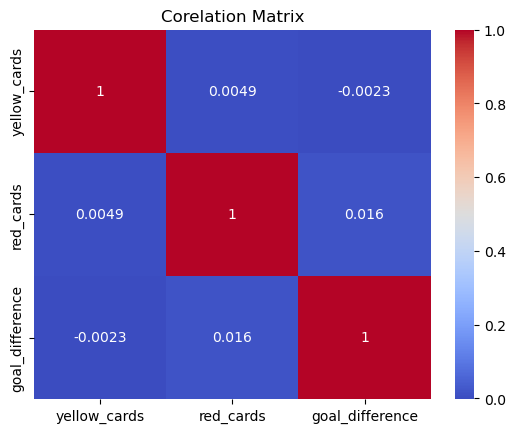

In [151]:
# ploting correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot = True, cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

Interpretation: 

Referee decisions on cards (yellow or red) do not have a significant statistical relationship with match outcomes.

Match outcomes (goal difference) are more likely influenced by other factors such as team performance, strategies, or skill levels rather than the number of cards issued by referees.

This result suggests that while cards are part of the game, they are not a dominant factor in determining the final goal difference or overall match outcomes.

# Substitution Patterns
Understand how teams use substitutions to manage player fatigue, influence match outcomes, and implement tactical strategies.

#### How does the timing of substitutions (first half vs. second half) vary between winning and losing teams?

In [152]:
# Filter out substitution events
substitutions = game_events[game_events['type'] == 'Substitutions']

In [175]:
game_events['type'].unique()

array(['Substitutions', 'Cards', 'Goals'], dtype=object)

In [153]:
# Identify winning and losing teams
games['winner'] = games.apply(lambda x: 'Home' if x['home_club_goals'] > x['away_club_goals'] else 'Away', axis=1)
games['loser'] = games.apply(lambda x: 'Away' if x['home_club_goals'] > x['away_club_goals'] else 'Home', axis=1)

In [154]:
# Merge games with substitutions
substitutions = substitutions.merge(games[['game_id', 'winner', 'loser']], on='game_id')

In [155]:
# Create a new column for substitution timing
substitutions['substitution_timing'] = substitutions['minute'].apply(lambda x: 'First Half' if x <= 45 else 'Second Half')

In [156]:
# Count substitutions by timing and match outcome
substitution_counts = substitutions.groupby(['winner', 'substitution_timing']).size().unstack(fill_value=0)
substitution_counts

substitution_timing,First Half,Second Half
winner,,
Away,14,332
Home,13,263


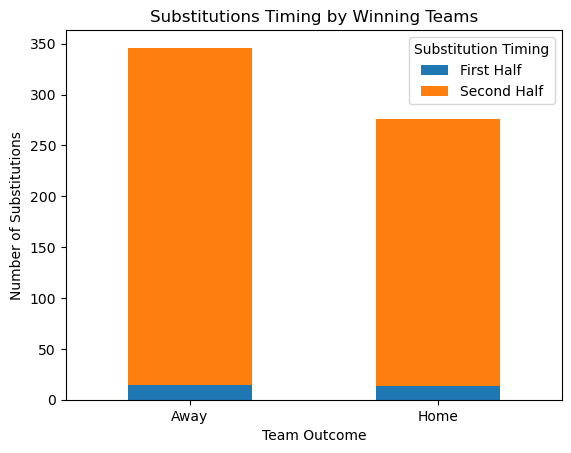

In [157]:
# Visualize the results
substitution_counts.plot(kind='bar', stacked=True)
plt.title('Substitutions Timing by Winning Teams')
plt.xlabel('Team Outcome')
plt.ylabel('Number of Substitutions')
plt.xticks(rotation=0)
plt.legend(title='Substitution Timing')
plt.show()

Both home and away teams exhibit a clear trend of making more substitutions in the second half than in the first half. This may indicate a common strategy among teams to conserve their substitutions for when the match is more critical, possibly to counteract fatigue, injuries, or to react to the evolving dynamics of the match.

#### Which teams make the most substitutions per match on average?

In [158]:
# Count total substitutions per game
substitution_count_per_game = substitutions.groupby('game_id').size().reset_index(name='substitution_count')

In [159]:
# Merge back with games to get team information
substitution_stats = substitution_count_per_game.merge(games[['game_id', 'home_club_name', 'away_club_name']], on='game_id')

In [160]:
# Calculate average substitutions per match for each team
avg_substitutions = pd.concat([
    substitution_stats.groupby('home_club_name')['substitution_count'].mean(),
    substitution_stats.groupby('away_club_name')['substitution_count'].mean()
]).groupby(level=0).mean().reset_index(name='average_substitutions')

In [161]:
# Sort by average substitutions
avg_substitutions = avg_substitutions.sort_values(by='average_substitutions', ascending=False)
avg_substitutions.rename(columns = {'index': 'Team Name'}, inplace = True)
avg_substitutions.head(10)

,Team Name,average_substitutions
207,spvgg greuther furth games,1.500000
116,NAC Breda,1.250000
78,Fortuna Sittardia Combinatie,1.125000
49,Esbjerg fB,1.125000
48,Eintracht Frankfurt Fuayball AG,1.111111
12,Aalborg BK,1.100000
77,Fortuna Dusseldorf,1.083333
32,Borussia Dortmund,1.081695
208,tsg 1899 hoffenheim football spielbetriebs Gmbh,1.076923
179,TSG 1899 Hoffenheim Football-Spielbetriebs GmbH,1.071429


Interpretation: SpVgg Greuther Fürth has the highest average substitutions per match at 1.5. This suggests that they are likely proactive in adjusting their strategy during matches, possibly due to player performance, fatigue, or tactical changes.

##### What is the trend of substitutions by position (e.g., attackers vs. defenders)?

In [162]:
# Merge substitutions with player data to get positions
substitutions = substitutions.merge(players[['player_id', 'position']], on='player_id')

In [163]:
# Count substitutions by position
substitution_counts_by_position = substitutions['position'].value_counts().reset_index()
substitution_counts_by_position.columns = ['position', 'substitution_count']
substitution_counts_by_position

,position,substitution_count
0,Attack,343
1,Midfield,182
2,Defender,96
3,Goalkeeper,1


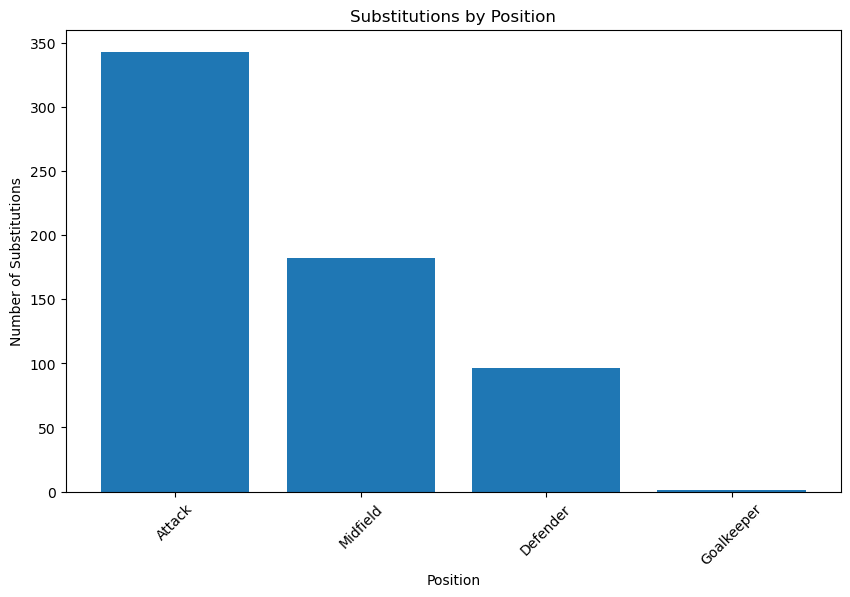

In [164]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(substitution_counts_by_position['position'], substitution_counts_by_position['substitution_count'])
plt.title('Substitutions by Position')
plt.xlabel('Position')
plt.ylabel('Number of Substitutions')
plt.xticks(rotation=45)
plt.show()

Interpretation: 

Attackers are substituted the most, indicating coaches frequently change them to keep the offense dynamic and fresh. This helps create more goal-scoring chances.

Goalkeepers are substituted very infrequently, usually only due to injury or special tactics, reflecting their crucial role in the game.

# Event Analysis
Examine match events (goals, fouls, cards, etc.) to understand game dynamics and identify key moments impacting performance.

Which types of events (e.g., goals, fouls, cards) occur most frequently during matches?

How do event types differ between domestic and international competitions?

How does the distribution of events (cards, goals) vary across competitions (domestic vs. international)?

What is the relationship between fouls committed and cards received by teams?

#### Which types of events (e.g., goals, fouls, cards) occur most frequently during matches?

In [165]:
# Count the frequency of each event type
event_counts = game_events['type'].value_counts()
print(event_counts)

Substitutions    1156
Goals             509
Cards             184
Name: type, dtype: int64


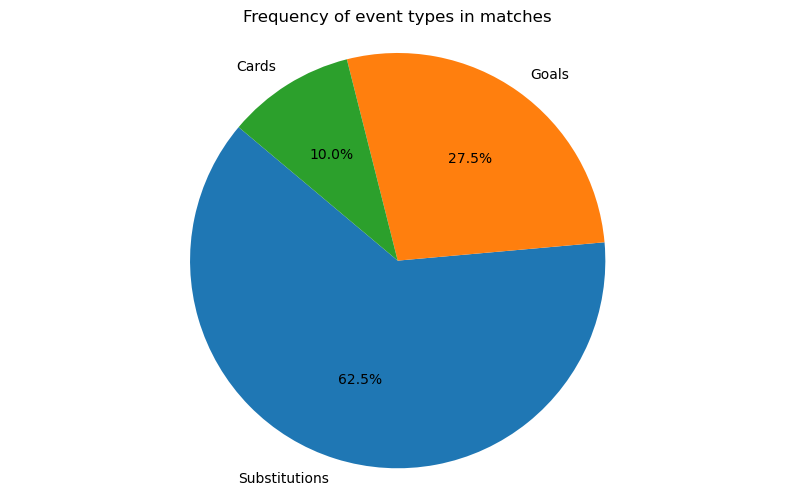

In [166]:
plt.figure(figsize=(10,6))
plt.pie(event_counts, labels = event_counts.index, autopct='%1.1f%%', startangle = 140, colors = plt.cm.tab10.colors)
plt.title("Frequency of event types in matches")
plt.axis('equal')
plt.show()

#### How do event types differ between domestic and international competitions?

In [167]:
# Merge the datasets to get competition type in game events
merged_data = game_events.merge(games[['game_id', 'competition_type']], on='game_id')

In [168]:
# Count event types for domestic and international competitions
event_counts_by_competition = merged_data.groupby(['competition_type', 'type']).size().unstack(fill_value=0)
event_counts_by_competition

type,Cards,Goals,Substitutions
competition_type,,,
domestic_cup,13,47,50
domestic_league,124,277,526
international_cup,21,19,44
other,0,3,2


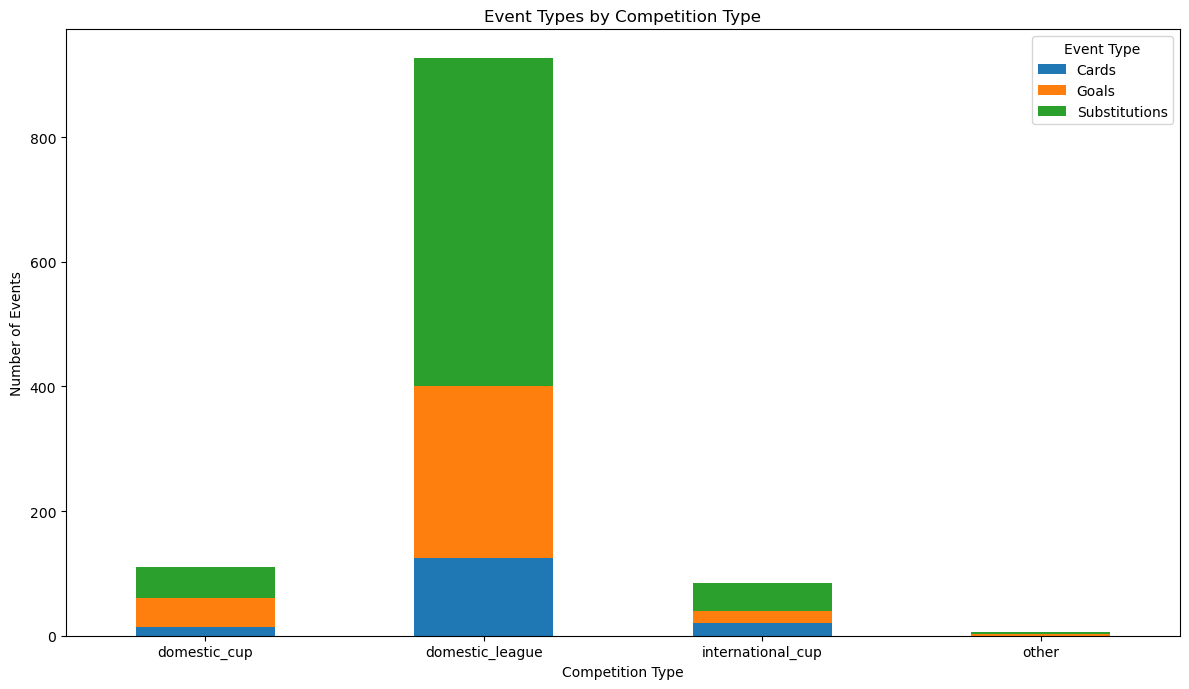

In [169]:
# Plot the results
event_counts_by_competition.plot(kind='bar', stacked=True, figsize=(12, 7), color=plt.cm.tab10.colors)
plt.title('Event Types by Competition Type')
plt.xlabel('Competition Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

Interpretation:
    Domestic Cup: The number of cards (13) is relatively low compared to goals (47) and substitutions (50), indicating that matches tend to be competitive but with fewer disciplinary actions.

Domestic League: This category shows the highest numbers across all types of events: cards (124), goals (277), and substitutions (526). This suggests a more intense competition with frequent player changes and officiating decisions.

# Sprint 9

## Event analysis using hypothesis testing

#### 1. Do Teams That Receive More Cards Have a Higher Likelihood of Losing?
Objective: Analyze if there is a significant relationship between the number of cards received and match outcomes (win/loss).

* Null Hypothesis (H₀): There is no significant difference in the number of cards received between winning and losing teams.
* Alternative Hypothesis (H₁): Losing teams receive significantly more cards than winning teams.
* Test:Use an independent t-test

In [70]:
from scipy.stats import ttest_ind

In [71]:
# Step 1: Group cards per game for both teams
cards_per_game = (
    appearances.groupby('game_id')[['yellow_cards', 'red_cards']].sum().reset_index()
)

In [72]:
# Step 2: Merge cards data with match results from the games table
games['goal_difference'] = games['home_club_goals'] - games['away_club_goals']
match_result_card = pd.merge(cards_per_game, games[['game_id', 'goal_difference']], on='game_id')

In [73]:
# Step 3: Create match outcome column (Win/Loss)
match_result_card['outcome'] = match_result_card['goal_difference'].apply(
    lambda x: 'Win' if x > 0 else ('Loss' if x < 0 else 'Draw')
)

In [74]:
# Step 4: Separate the data into winning and losing teams
winning_teams = match_result_card[match_result_card['outcome'] == 'Win']
losing_teams = match_result_card[match_result_card['outcome'] == 'Loss']

In [77]:
# Step 5: Perform t-test on the number of cards
win_cards = winning_teams['yellow_cards'] + winning_teams['red_cards']
loss_cards = losing_teams['yellow_cards'] + losing_teams['red_cards']

t_stat, p_value = ttest_ind(win_cards, loss_cards)
print("T-statistic: ",t_stat, "P-value: ",p_value)

T-statistic:  0.9766186442220494 P-value:  0.3288533145268647


In [78]:
if p_value < 0.05:
    print("Teams that receive more cards are more likely to lose.")
else:
    print("There is no significant relationship between cards and losing.")

There is no significant relationship between cards and losing.


#### 2. Do Substitutions in the Second Half Impact Match Outcomes More Than First-Half Substitutions?
Objective: Determine whether second-half substitutions have a greater effect on match outcomes compared to first-half substitutions.

* Null Hypothesis (H₀): There is no significant difference in match outcomes based on the timing of substitutions (first half vs. second half).
* Alternative Hypothesis (H₁): Second-half substitutions have a significant impact on match outcomes compared to first-half substitutions.
* Test:  use a t-test

In [79]:
# Step 1: Filter first-half and second-half substitutions
first_half_subs = game_events[
    (game_events['type'].str.contains('Substitution', case=False, na=False)) & 
    (game_events['minute'] <= 45)
]

second_half_subs = game_events[
    (game_events['type'].str.contains('Substitution', case=False, na=False)) & 
    (game_events['minute'] > 45)
]

In [80]:
# Step 2: Count substitutions by game_id
first_half_counts = first_half_subs.groupby('game_id').size().reset_index(name='first_half_subs')
second_half_counts = second_half_subs.groupby('game_id').size().reset_index(name='second_half_subs')


In [81]:
# Step 3: Calculate Goal Difference (Match Outcome)
games['goal_difference'] = games['home_club_goals'] - games['away_club_goals']

In [82]:
# Step 4: Merge Substitution Counts with Games Table
data = pd.merge(games[['game_id', 'goal_difference']], first_half_counts, on='game_id', how='left').fillna(0)
data = pd.merge(data, second_half_counts, on='game_id', how='left').fillna(0)


In [86]:
# Step 5: Extract Goal Differences Based on Substitution Timing
first_half_outcomes = data[data['first_half_subs'] > 0]['goal_difference']
second_half_outcomes = data[data['second_half_subs'] > 0]['goal_difference']

In [87]:
# Step 6: Perform T-Test
t_stat, p_value = ttest_ind(first_half_outcomes, second_half_outcomes)
print("T Statistics: ",t_stat, "\n P Value: ",p_value)

T Statistics:  0.7703147634959405 
 P Value:  0.4414119139128658


In [88]:
# Step 7: Interpretation
if p_value < 0.05:
    print("There is a significant difference in match outcomes based on the timing of substitutions.")
else:
    print("No significant difference in match outcomes based on the timing of substitutions.")

No significant difference in match outcomes based on the timing of substitutions.


# Compitition Analysis

#### 1. Which competitions have the highest average attendance?
Objective: Identify which tournaments or leagues attract the largest crowds to help clubs and organizers focus on high-demand events.

In [93]:
# group compitition_id and calculate the average attendance
avg_attendance = (
    games.groupby(['competition_id'])['attendance']
    .mean()
    .reset_index(name='average_attendance')
    .sort_values(by='average_attendance', ascending = False)
)
# Display the top competition by average Attendance: 
print("Top competitions by average Attendance: \n")
avg_attendance.head()

Top competitions by average Attendance: 



,competition_id,average_attendance
7,DFL,81360.000000
21,NLSC,49418.500000
18,L1,43210.767241
15,FRCH,41237.000000
4,CL,40441.308511


#### 2.How do team performances vary across domestic and international competitions?

Objective: Analyze whether teams perform better in domestic leagues or international tournaments to uncover patterns and potential reasons (e.g., travel, player fatigue).

In [98]:
# calculate goal_difference for each game
games['goal_differennce'] = games['home_club_goals'] - games['away_club_goals']

# group compitition type to analyze performance variation
performance_by_competition=(
games.groupby('competition_type')['goal_difference']
    .sum()
    .reset_index(name = 'total_goal_difference')
)

# Display result
print("Performance Variation (goal_difference) by competition type")
performance_by_competition

Performance Variation (goal_difference) by competition type


,competition_type,total_goal_difference
0,domestic_cup,-54
1,domestic_league,1003
2,international_cup,100
3,other,8


#### 3. What is the distribution of goals scored across different competitions?

Objective: Determine if some competitions are more goal-rich than others, which can assist in marketing strategies and fan engagement.

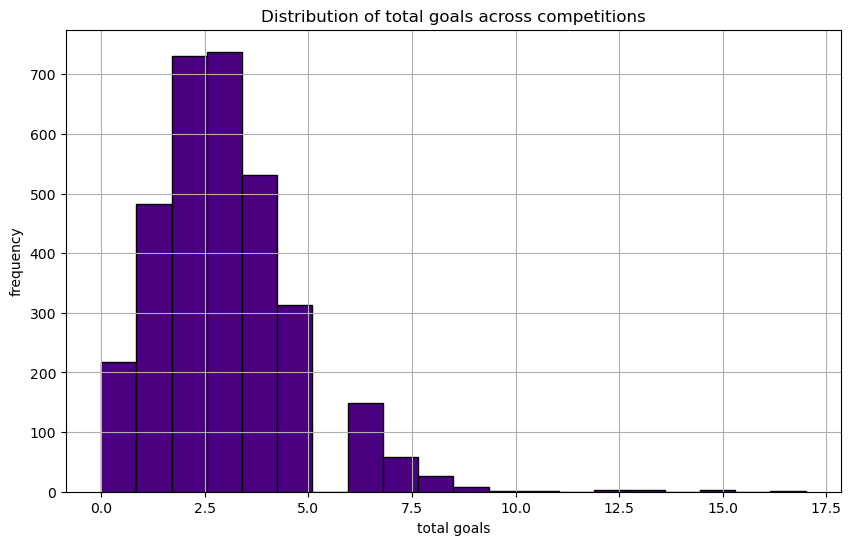

In [109]:
import matplotlib.pyplot as plt
# calculate total goals in each game
games['total_goals'] = games['home_club_goals'] + games['away_club_goals']

# plot the distribution of total goals across competitions
plt.figure(figsize=(10,6))
games['total_goals'].hist(bins=20, edgecolor = 'black',color = 'Indigo')
plt.title("Distribution of total goals across competitions")
plt.xlabel("total goals")
plt.ylabel('frequency')
plt.show()

#### 4. Which competitions see the most disciplinary actions (cards, fouls)?

Objective: Explore whether certain leagues or tournaments are more aggressive, helping referees, teams, or governing bodies address behavioral patterns.

In [114]:
# calculate total yellow and red cards by  competition
cards_by_competition = (
appearances.groupby('competition_id')[['yellow_cards', 'red_cards']]
.sum()
.reset_index()
.sort_values(by=['yellow_cards','red_cards'], ascending = False)
)
# Display competitions with the most disciplinary actions
print('Competition with most Disciplinary Actions:')
cards_by_competition.head()

Competition with most Disciplinary Actions:


,competition_id,yellow_cards,red_cards
18,L1,148,4
16,GB1,70,3
8,DK1,63,4
19,NL1,28,0
0,BE1,23,0


# Sprint 10

## Player Attributes and Demographics
Descriptive questions are in sql workbench

## Business questions on K-means clustering
#### 1. How can we segment players into distinct groups based on their performance and physical attributes?
Objective: Segment players into distinct groups based on their performance and physical attributes to optimize talent identification, tailor player development strategies, and inform transfer decisions.

In [150]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
merged_data['age'] = (pd.Timestamp.now() - pd.to_datetime(merged_data['date_of_birth'])).dt.days // 365

In [126]:
# Select features and handle missing values
features = merged_data[['height_in_cm', 'age', 'goals', 'assists', 'minutes_played', 'market_value_in_eur']].fillna(0)

In [127]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

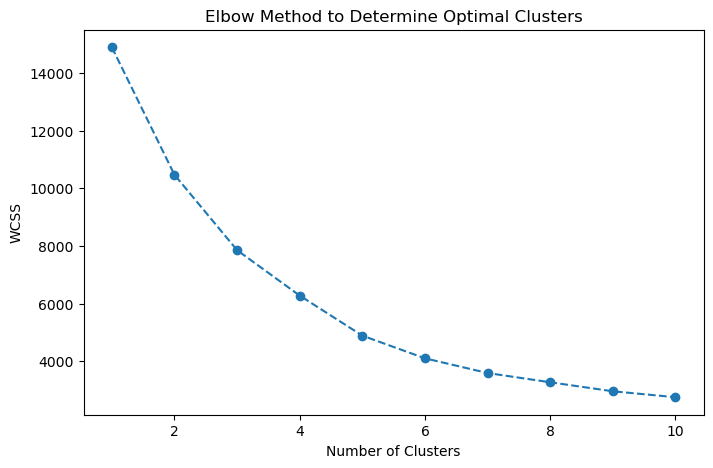

In [128]:
# Use Elbow Method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

In [134]:
# Choose the optimal number of clusters based on the Elbow method
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
merged_data['cluster'] = kmeans.fit_predict(scaled_features)

In [135]:
# Add standardized features for PCA and visualization
visual_data = pd.DataFrame(scaled_features, columns=['height_in_cm', 'age', 'goals', 'assists', 'minutes_played', 'market_value_in_eur'])
visual_data['cluster'] = merged_data['cluster']

In [136]:
# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)


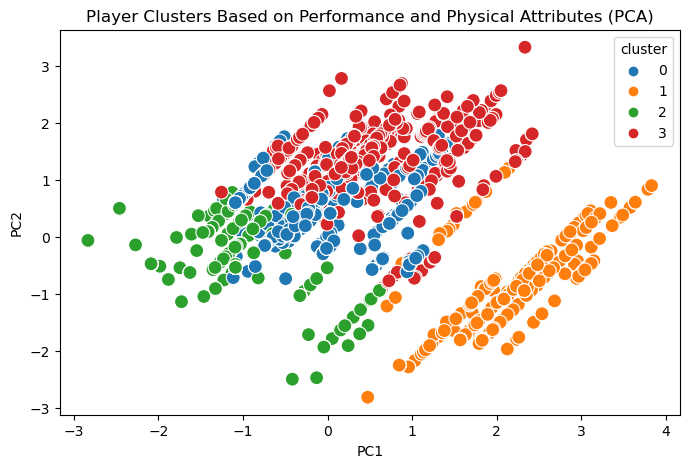

In [137]:
# Create DataFrame for visualization with PCA components
pca_visual_data = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_visual_data['cluster'] = merged_data['cluster']

# Plot the PCA-based clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_visual_data, x='PC1', y='PC2', hue='cluster', palette='tab10', s=100)
plt.title('Player Clusters Based on Performance and Physical Attributes (PCA)')
plt.show()

In [138]:
# Analyze clusters and their influence on market value
print(merged_data.groupby('cluster')[['age', 'height_in_cm', 'market_value_in_eur']].mean())

               age  height_in_cm  market_value_in_eur
cluster                                              
0        33.263482    181.441448         7.396764e+05
1        26.433131    180.601824         2.582675e+06
2        37.866368    190.691480         1.055874e+06
3        33.122888    182.095238         8.210445e+05


In [139]:
# Calculate 'age' from 'date_of_birth' in the test data
test_data['age'] = (pd.Timestamp.now() - pd.to_datetime(test_data['date_of_birth'])).dt.days // 365

# Select the same features as in training data and handle missing values
test_features = test_data[['height_in_cm', 'age', 'goals', 'assists', 'minutes_played', 'market_value_in_eur']].fillna(0)

# Standardize the test features using the same scaler
scaled_test_features = scaler.transform(test_features)

In [140]:

# Predict clusters for the test data
test_data['predicted_cluster'] = kmeans.predict(scaled_test_features)

# Display player names with predicted clusters
print(test_data[['player_name', 'predicted_cluster']])

        player_name  predicted_cluster
0  Luca de la Torre                  1
1  Luca de la Torre                  1


In [141]:
# Filter the data for the specific player
player_data = test_data[test_data['player_name'] == 'Luca de la Torre']

# Calculate age from the 'date_of_birth' column
player_data['age'] = (pd.Timestamp.now() - pd.to_datetime(player_data['date_of_birth'])).dt.days // 365

# Display the player's name and age
print(player_data[['player_name', 'date_of_birth', 'age']])


        player_name date_of_birth  age
0  Luca de la Torre    1998-05-23   26
1  Luca de la Torre    1998-05-23   26


#### 2. What demographic clusters exist among players, and how do they influence market value?
Objective: Identify distinct demographic clusters among players and evaluate how these clusters impact market value to guide recruitment, scouting, and transfer strategies.

In [142]:
# Select demographic features for clustering
features = merged_data[['age', 'height_in_cm', 'market_value_in_eur', 'goals', 'assists']]

In [143]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

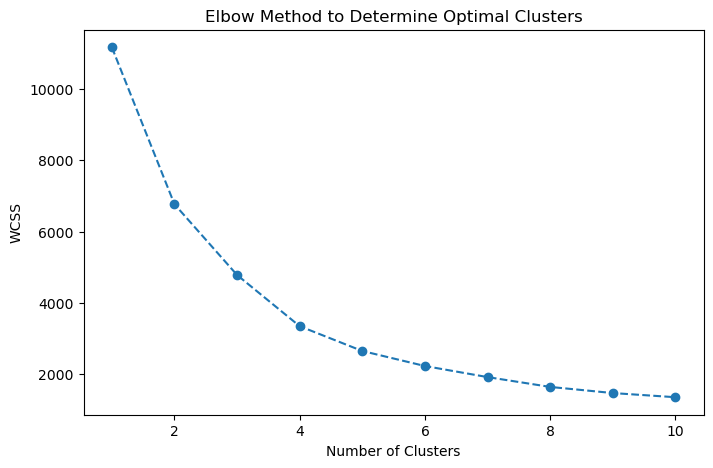

In [144]:
# Apply the Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

In [145]:
# Perform K-means clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

In [146]:
# Add cluster labels to the merged data
merged_data['cluster'] = cluster_labels

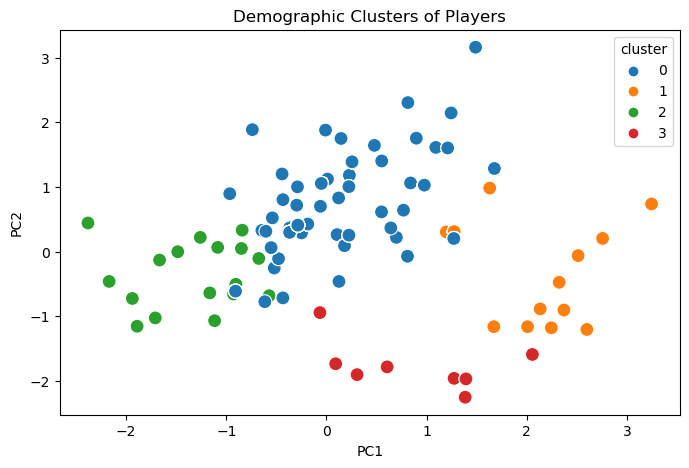

In [147]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
visual_data = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
visual_data['cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=visual_data, x='PC1', y='PC2', hue='cluster', palette='tab10', s=100)
plt.title('Demographic Clusters of Players')
plt.show()

In [148]:
# Analyze clusters and their influence on market value
print(merged_data.groupby('cluster')[['age', 'height_in_cm', 'market_value_in_eur']].mean())

               age  height_in_cm  market_value_in_eur
cluster                                              
0        32.901820    181.374517         7.252068e+05
1        26.266781    178.714286         2.545611e+06
2        40.774229    189.137665         8.034141e+05
3        29.566667    193.119048         2.019048e+06


In [149]:
# Test the model with new data (test_data)
test_data['age'] = (pd.Timestamp.now() - pd.to_datetime(test_data['date_of_birth'])).dt.days // 365
test_features = test_data[['age', 'height_in_cm', 'market_value_in_eur', 'goals', 'assists']].fillna(0)
scaled_test_features = scaler.transform(test_features)
# Predict clusters for the test data
test_data['predicted_cluster'] = kmeans.predict(scaled_test_features)

# Display test results
print(test_data[['player_name', 'predicted_cluster']])

        player_name  predicted_cluster
0  Luca de la Torre                  1
1  Luca de la Torre                  1


# Contract Management

#### 1. What percentage of players have contracts expiring in the current season, and which clubs have the highest number of expiring contracts?

In [151]:
# Filter players whose contracts expire this season (assuming current season is 2024)
current_year = datetime.now().year
expiring_contracts = players[players['contract_expiration_date'].dt.year == current_year]


In [152]:
# Group by club to see expiring contracts per club
expiring_by_club = expiring_contracts.groupby('current_club_id')['player_id'].count().reset_index()
expiring_by_club.columns = ['current_club_id', 'expiring_contracts']
print(expiring_by_club)

    current_club_id  expiring_contracts
0                11                   1
1                18                   1
2                58                   1
3                65                   1
4                82                   1
5                86                   1
6                89                   1
7               105                   1
8               289                   2
9               369                   1
10              370                   1
11              383                   2
12              385                   1
13              405                   1
14              475                   1
15              533                   1
16              601                   1
17              703                   1
18              724                   1
19              798                   1
20              833                   1
21              931                   1
22              969                   1
23             1096                   1


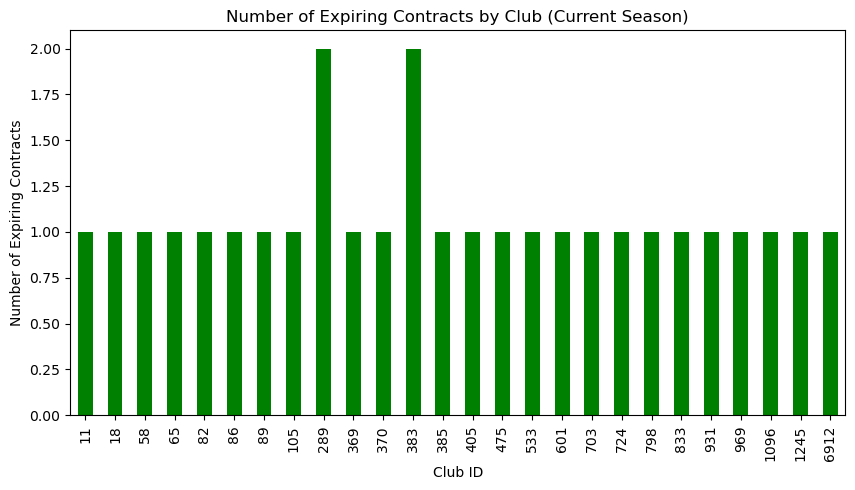

In [174]:
# Visualize expiring contracts by club
expiring_by_club.plot(kind='bar', x='current_club_id', y='expiring_contracts', figsize=(10, 5), legend=False, color='green')
plt.xlabel('Club ID')
plt.ylabel('Number of Expiring Contracts')
plt.title('Number of Expiring Contracts by Club (Current Season)')
plt.show()

#### 2. Is there a correlation between the length of player contracts and their current or highest market value?

In [161]:
# Calculate contract length (years) from current year to expiration date
players['contract_length'] = players['contract_expiration_date'].dt.year - datetime.now().year

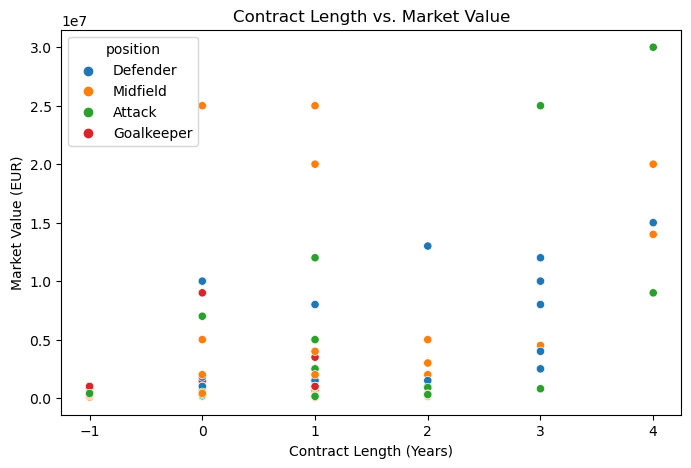

In [162]:
# Scatter plot of contract length vs. market value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=players, x='contract_length', y='market_value_in_eur', hue='position', palette='tab10')
plt.xlabel('Contract Length (Years)')
plt.ylabel('Market Value (EUR)')
plt.title('Contract Length vs. Market Value')
plt.show()

In [163]:
# Calculate correlation
correlation = players[['contract_length', 'market_value_in_eur']].corr()
print("Correlation between Contract Length and Market Value:\n", correlation)

Correlation between Contract Length and Market Value:
                      contract_length  market_value_in_eur
contract_length             1.000000             0.477451
market_value_in_eur         0.477451             1.000000


#### 3. Which agents represent the highest market value players, and how does agent representation influence contract duration?

In [165]:
# Group by agent and calculate the total market value of their players
agent_market_value = players.groupby('agent_name')['market_value_in_eur'].sum().reset_index()
agent_market_value = agent_market_value.sort_values(by='market_value_in_eur', ascending=False)

print(agent_market_value.head(10))


              agent_name  market_value_in_eur
44             Wasserman          143550000.0
46   YMU Management Ltd.           32700000.0
38                   SXI           18000000.0
4      BS Group - BS Law           14000000.0
26               Octagon           10500000.0
21         Joes Blakborn           10000000.0
22           Mega Sports            9450000.0
40  Sports Invest UK ltd            8000000.0
30   PROSPORT Management            7300000.0
18             Gestifute            7000000.0


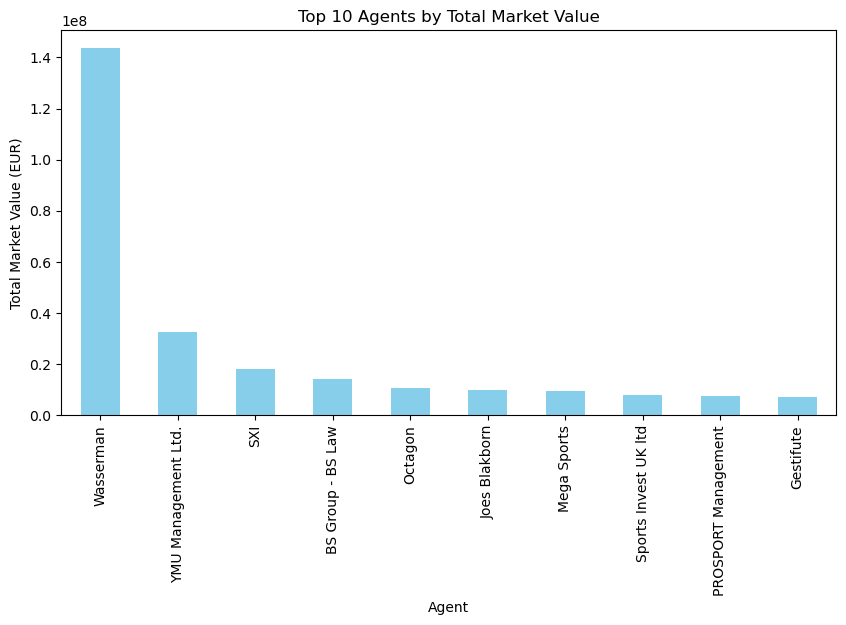

In [169]:
# Visualize the top 10 agents by total market value
agent_market_value.head(10).plot(kind='bar', x='agent_name', y='market_value_in_eur', figsize=(10, 5), legend=False, color = 'skyblue')
plt.xlabel('Agent')
plt.ylabel('Total Market Value (EUR)')
plt.title('Top 10 Agents by Total Market Value')
plt.show()

#### 4. How do players' performance metrics (e.g., goals, assists, and minutes played) vary based on the remaining duration of their contracts?

In [170]:
# Merge 'players' with 'appearances' to get performance metrics
performance_data = players.merge(appearances, on='player_id', how='left')

In [171]:
# Calculate remaining contract years
performance_data['remaining_years'] = performance_data['contract_expiration_date'].dt.year - datetime.now().year

In [172]:
# Group by remaining years and calculate average goals, assists, and minutes played
performance_summary = performance_data.groupby('remaining_years').agg(
    avg_goals=('goals', 'mean'),
    avg_assists=('assists', 'mean'),
    avg_minutes=('minutes_played', 'mean')
).reset_index()

print(performance_summary)

   remaining_years  avg_goals  avg_assists  avg_minutes
0               -1   0.068041     0.041237    75.414433
1                0   0.160556     0.075853    66.074589
2                1   0.059065     0.070878    71.816641
3                2   0.266667     0.133333    79.644444
4                3   0.178423     0.145228    65.448133
5                4   0.118644     0.050847    50.932203


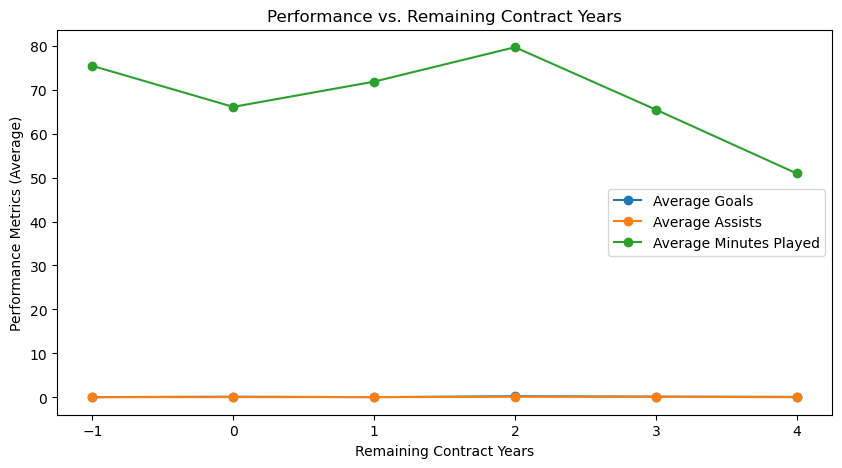

In [173]:
# Visualize the performance vs. remaining contract years
performance_summary.plot(x='remaining_years', y=['avg_goals', 'avg_assists', 'avg_minutes'], kind='line', marker='o', figsize=(10, 5))
plt.xlabel('Remaining Contract Years')
plt.ylabel('Performance Metrics (Average)')
plt.title('Performance vs. Remaining Contract Years')
plt.legend(['Average Goals', 'Average Assists', 'Average Minutes Played'])
plt.show()